# Foundations of Data Mining: Assignment 2

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [37]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all" 

In [38]:
# This is a temporary read-only OpenML key. Replace with your own key later. 
oml.config.apikey = '271471759e7767d08e44a61fab1a0492'

## Kernel selection (4 points (1+2+1))
SVMs can be trained with different kernels. Generate a 2-dimensional dataset as shown below and study the effect of the choice of kernel by visualizing the results.

- Train a SVM classifier on the dataset using respectively a linear, polynomial and radial basis function (RBF) kernel, evaluate the performance of each kernel using 10-fold cross-validation and AUC. Which one works best? Visualize the results. Can you intuitively explain why one kernel is more suited than another?
    - Hint: you can use the visualization code used in class. It is under mglearn/plot_svm.py > plot_svm_kernels().
- Take the RBF kernel and vary both the C parameter and the kernel width ($\gamma$). Use 3 values for each (a very small, default, and very large value). For each of the 9 combinations, create the same RBF plot as before, report the number of support vectors, and the AUC performance. Explain the performance results. When are you over/underfitting?
    - Hint: values for C and $\gamma$ are typically in [$2^{-15}..2^{15}$] on a log scale. 
    - Hint: don't count the support vectors manually, retrieve them from the trained SVM.
- Vary C and $\gamma$ again, but this time use a grid of at least 20x20, vary both parameters uniformly on a log scale, and visualise the results using a $C \times \gamma \rightarrow AUC$ heatmap. Explain the performance results, and compare them to the 9 results obtained in the previous subquestion. Can you also tell in which regions of the heatmap you are over/underfitting?
    - Hint: We've constructed such a heatmap in class and in assignment 1.

In [8]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import cross_val_score

X, y = make_blobs(centers=2, n_samples=1000, random_state=0)
print(X[0], y[0])
print(np.shape(X), np.shape(y))

[ 0.467  3.866] 0
(1000, 2) (1000,)


#### Train a SVM classifier on the dataset using respectively a linear, polynomial and radial basis function (RBF) kernel

[ 0.998  0.993  0.995  0.987  0.996  0.997  0.996  0.993  0.993  0.989]
0.99364
[ 0.998  0.991  0.995  0.985  0.992  0.998  0.996  0.993  0.993  0.989]
0.99288
[ 0.998  0.976  0.981  0.963  0.978  0.985  0.969  0.962  0.98   0.976]
0.9768


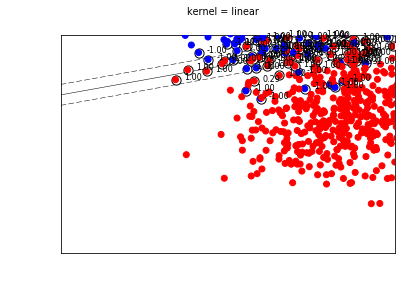

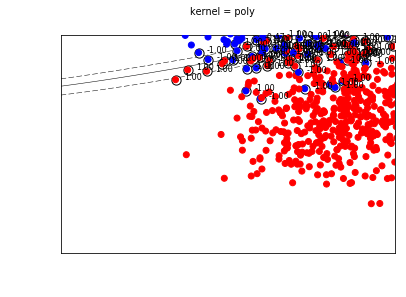

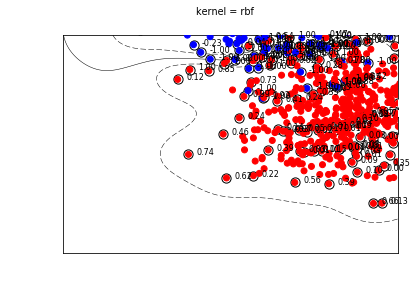

In [6]:
models = [SVC(kernel='linear'), SVC(kernel='poly'), SVC(kernel='rbf')]

# Fit the model
for clf in models:
    scores = cross_val_score(clf, X, y, cv=10, scoring="roc_auc")
    mean_score = np.mean(scores)
    print(scores)
    print(mean_score)

# Slightly modified the mglearn.plots.plot_svm_kernels() method to accept X and y as parameters
mglearn.plots.plot_svm_kernels(X, y)

The SVM with linear and poly kernel are nearly identical and have a good decision boundary whereas SVM with RBF kernel has a very complex decision boundary stemming from the higher number of support vectors. Since the RBF kernel takes the shape of the training data, it is overfitting and therefore will not generalize well. Furthermore, Linear and Poly kernel also have a higher test score than the RBF kernel.

#### Take the RBF kernel and vary both the C parameter and the kernel width ($\gamma$).

C: 0.001 | Gamma: 0.01
Number of Support vectors: 1000
AUC Scores: [ 0.998  0.992  0.995  0.986  0.996  0.997  0.996  0.991  0.993  0.989] | Mean: 0.99332


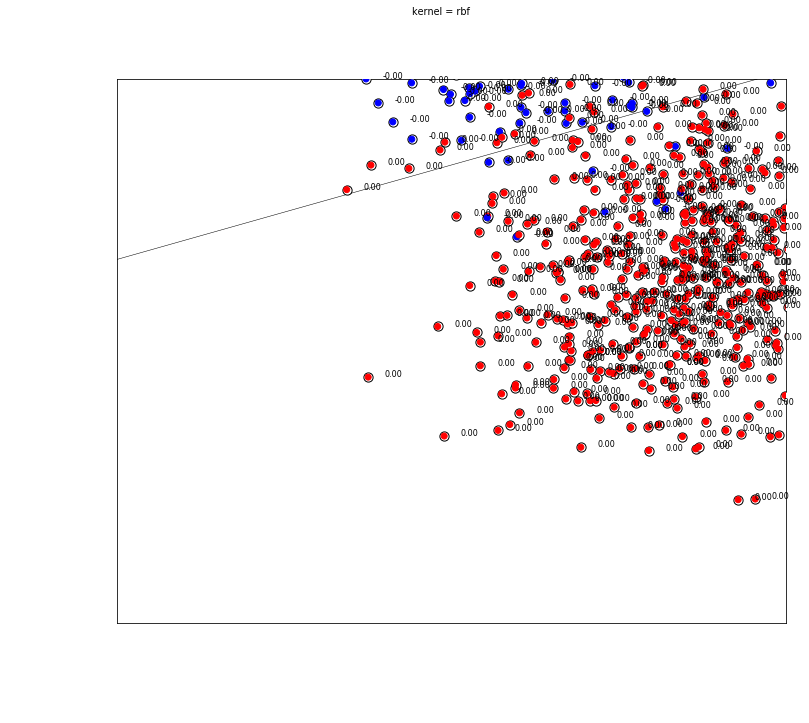

C: 0.001 | Gamma: 1
Number of Support vectors: 1000
AUC Scores: [ 0.996  0.985  0.99   0.972  0.99   0.998  0.986  0.984  0.98   0.978] | Mean: 0.98592


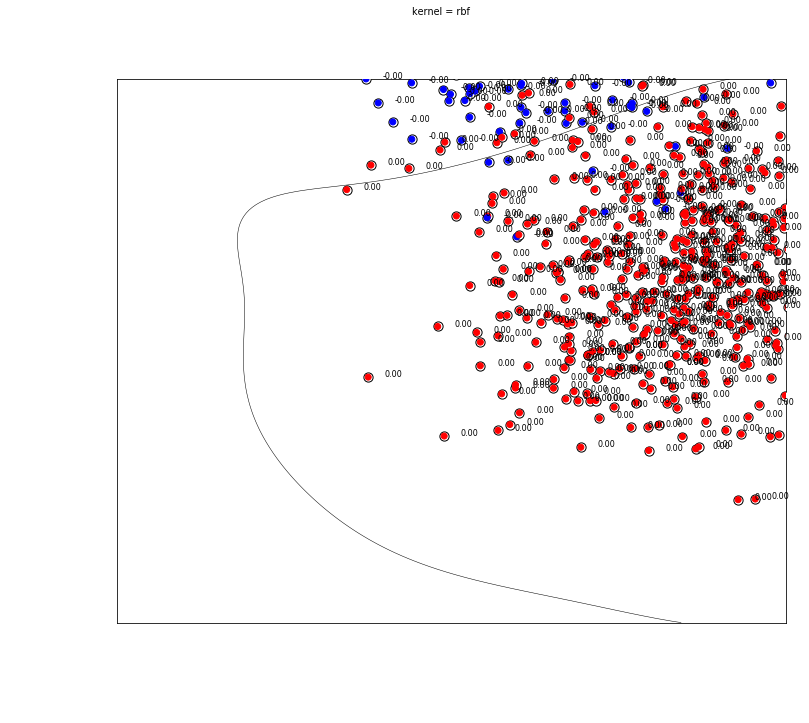

C: 0.001 | Gamma: 100.0
Number of Support vectors: 1000
AUC Scores: [ 0.988  0.99   0.995  0.944  0.967  0.974  0.97   0.971  0.988  0.976] | Mean: 0.97628


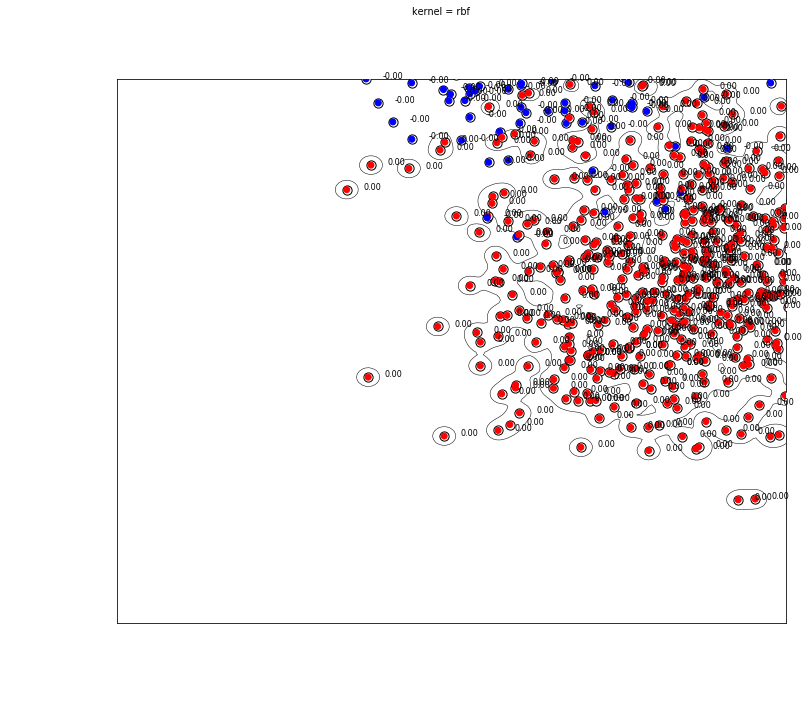

C: 1 | Gamma: 0.01
Number of Support vectors: 185
AUC Scores: [ 0.998  0.992  0.995  0.985  0.996  0.997  0.996  0.991  0.993  0.989] | Mean: 0.99328


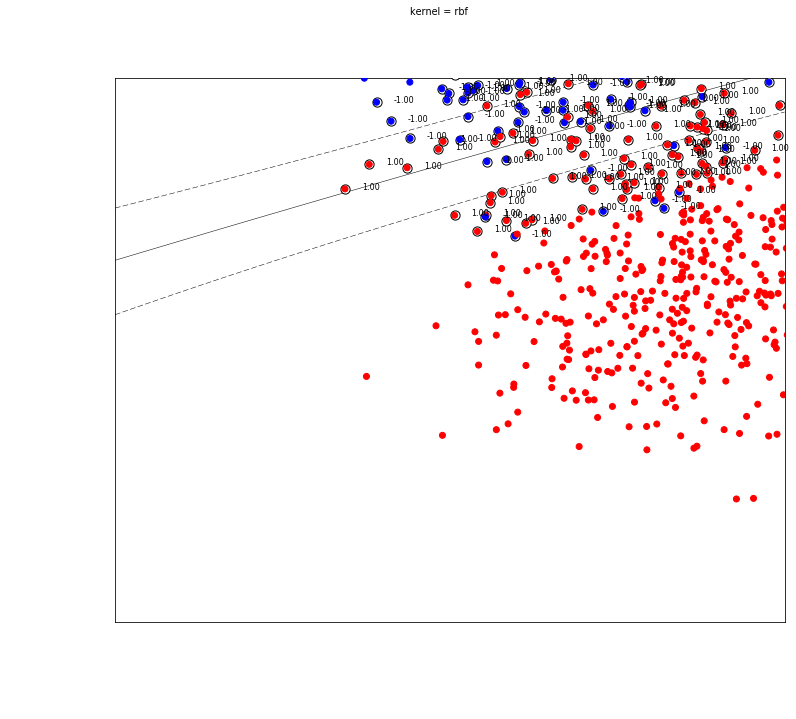

C: 1 | Gamma: 1
Number of Support vectors: 160
AUC Scores: [ 0.998  0.977  0.979  0.954  0.964  0.997  0.962  0.964  0.988  0.982] | Mean: 0.97644


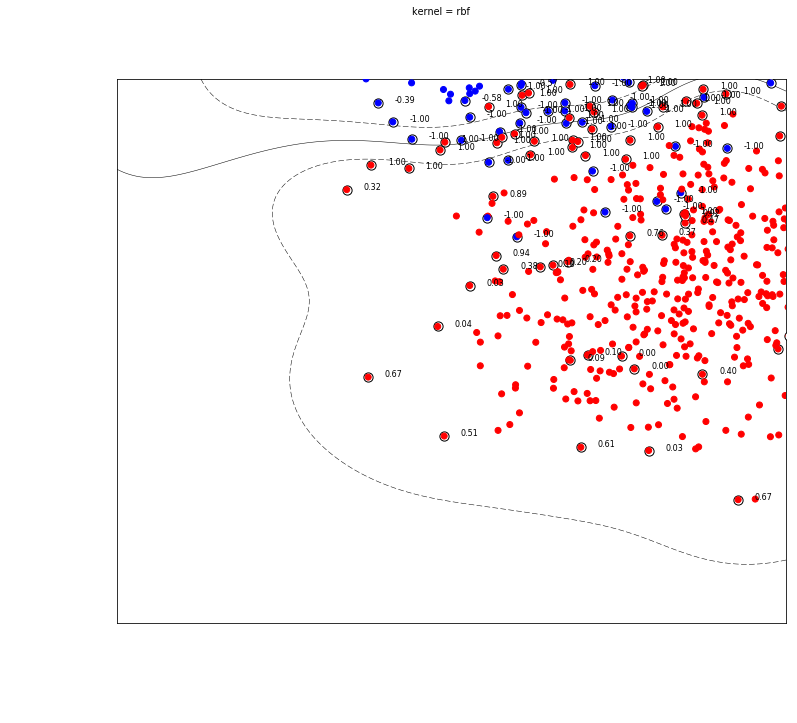

C: 1 | Gamma: 100.0
Number of Support vectors: 891
AUC Scores: [ 0.984  0.987  0.995  0.945  0.964  0.968  0.96   0.965  0.988  0.974] | Mean: 0.97292


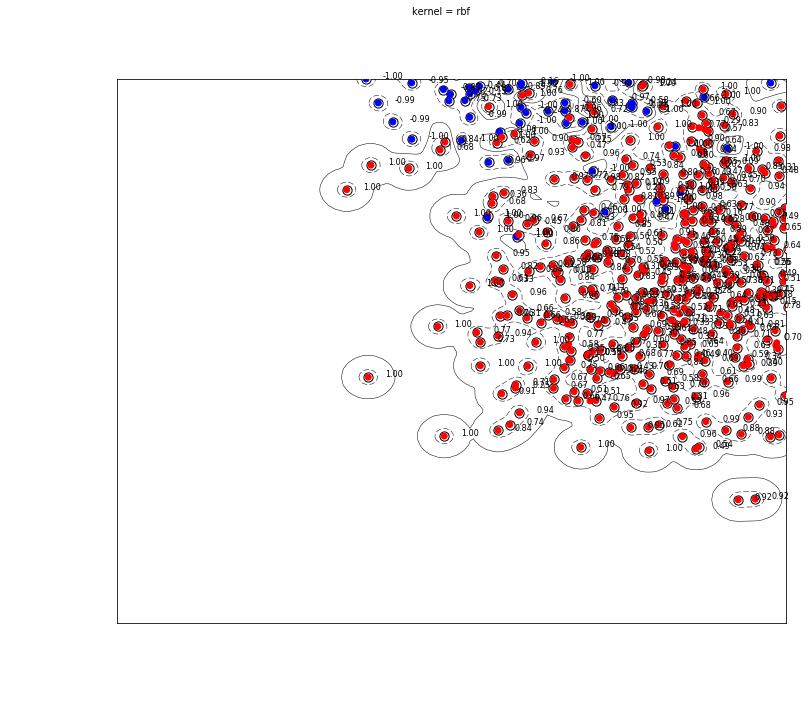

C: 1000.0 | Gamma: 0.01
Number of Support vectors: 106
AUC Scores: [ 0.998  0.992  0.995  0.987  0.993  0.997  0.995  0.992  0.99   0.989] | Mean: 0.99268


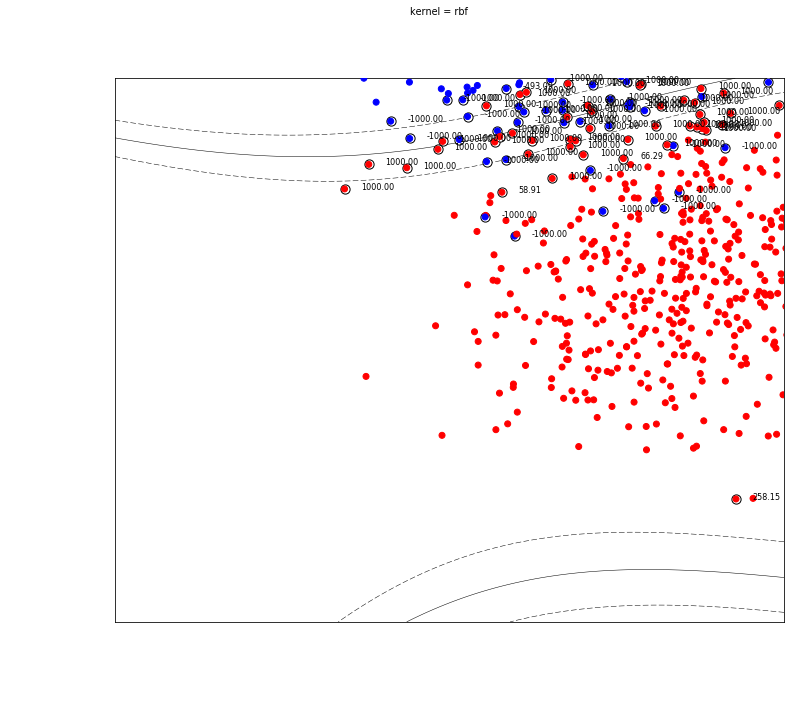

C: 1000.0 | Gamma: 1
Number of Support vectors: 117
AUC Scores: [ 0.973  0.977  0.985  0.981  0.989  0.968  0.962  0.974  0.996  0.986] | Mean: 0.97912


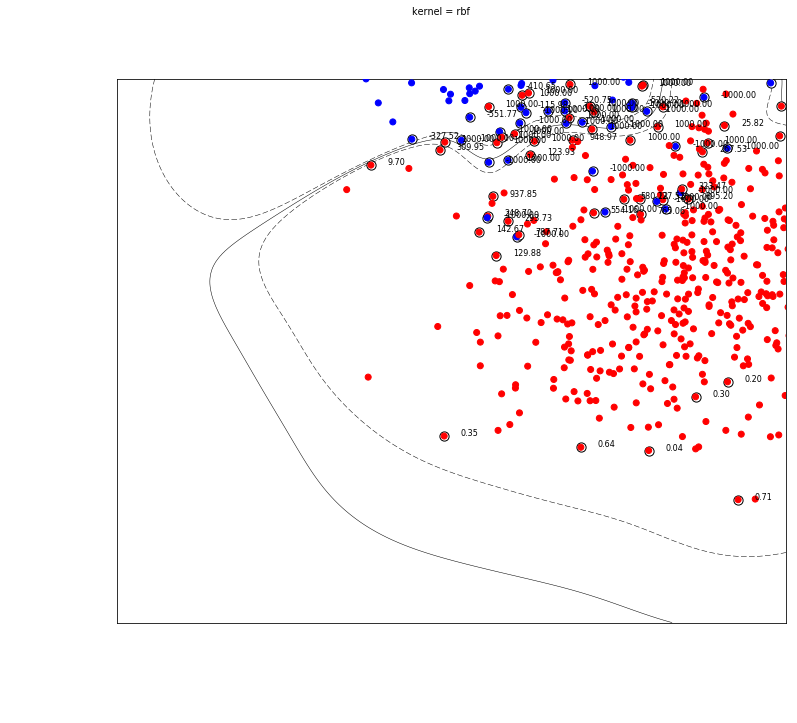

C: 1000.0 | Gamma: 100.0
Number of Support vectors: 877
AUC Scores: [ 0.98   0.976  0.975  0.94   0.948  0.957  0.96   0.96   0.946  0.961] | Mean: 0.96032


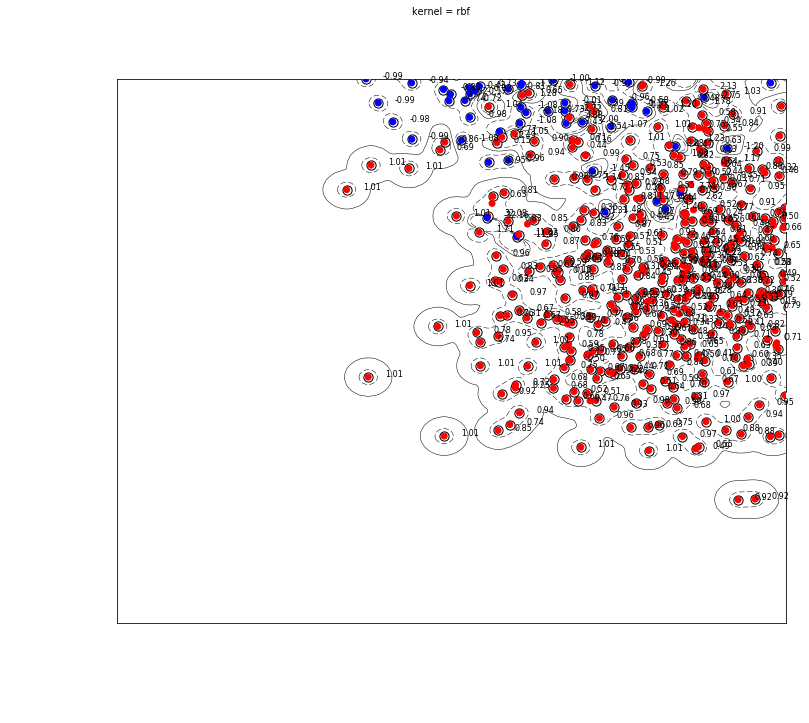

In [11]:
C_2d_range = [1e-3, 1, 1e3]
gamma_2d_range = [1e-2, 1, 1e2]
plt.rcParams['figure.figsize'] = (12., 10.)

for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(kernel='rbf', C=C, gamma=gamma)
        _ = clf.fit(X, y)
        print('C:', C, '| Gamma:', gamma)
        print("Number of Support vectors:", len(clf.support_vectors_[:]))
        
        scores = cross_val_score(clf, X, y, cv=10, scoring="roc_auc")
        print("AUC Scores:", scores, "| Mean:", np.mean(scores))
        
        # plot the rbf model
        # Slightly modified the mglearn.plots.plot_svm_kernels() method to accept X and y as parameters
        mglearn.plots.plot_svm_kernels(X, y, kernels=['rbf'], C=C, gamma=gamma)

plt.rcParams['figure.figsize'] = (6., 4.)

#### Explain the performance results. When are you over/underfitting?
All combinations have really high AUC scores here. We notice that with increasing gamma, there is more complexity. We can also see this trend in the AUC scores. Also, for a single gamma value, with increasing regularization, there is less overfitting. This point is clear when we look at gamma=100 cases. The underfitting cases happens when the decision boundary does not separate enough number of samples properly and it overfits when there are too many support vectors. We can see that there is an increasing number of support vectors with higher gamma which corresponds with our previous observation.

#### Vary C and $\gamma$ again but this time with grid search

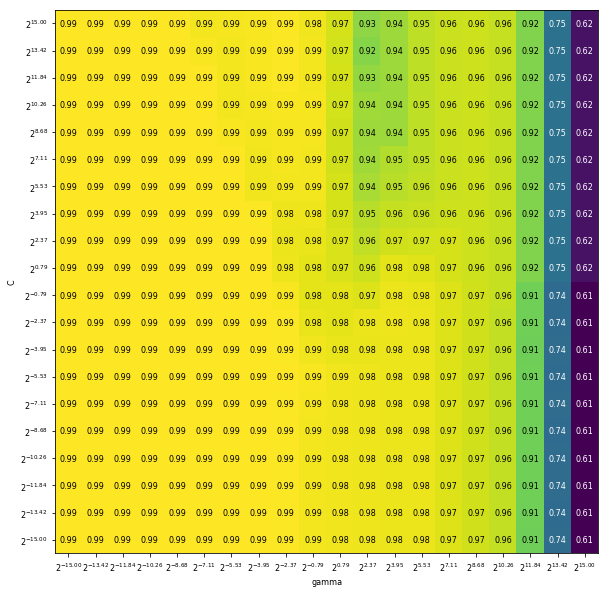

In [15]:
from sklearn.model_selection import GridSearchCV

clf = SVC(kernel='rbf')
param_grid = {
    'C': np.logspace(-15, 15, 20, base=2),
    'gamma': np.logspace(-15, 15, 20, base=2)
}

# perform grid search
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='roc_auc', n_jobs=-1)
_ = grid_search.fit(X, y)

# Visualize the results as heatmap
results = grid_search.cv_results_
scores = np.array(results['mean_test_score']).reshape(len(param_grid['C']), len(param_grid['gamma']))

_ = plt.figure(figsize=(12, 10))
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=['$2^{%.2f}$' % i for i in np.linspace(-15, 15, 20)],
                      ylabel='C', yticklabels=['$2^{%.2f}$' % i for i in np.linspace(-15, 15, 20)], cmap="viridis")

#### Explain the performance results, and compare them to the 9 results obtained in the previous subquestion. Can you also tell in which regions of the heatmap you are over/underfitting?

From the heatmap, we can see that the models produce a score no less than 0.99 in most of the cells for $\gamma < 2^{.79}$. Between $2^{.79} \leq \gamma < 2^{5.53}$, we clearly see that the AUC scores decrease with increasing regularization (C). This can be attributed to decrease in overfitting with higher C as we concluded from the previous question. Furthermore, between $2^{11.84} \leq \gamma \leq 2^{15}$, we see sharp decrease in AUC scores. This is because with such high gamma values, the model overfits the training data too much that it scores poorly on unseen samples of the test set.

## Robots and SVMs (4 points (2+1+1))

The [Wall Robot Navigation dataset](http://www.openml.org/d/1497) contains about 5500 readings of an ultrasound sensor array mounted on a robot, and your task is to finetune and train an SVM classifier to predict how the robot should move next.

- Make a stratified 80-20 split of the data. On the training set alone, optimize the main hyperparameters of the SVM for Accuracy with a random search. Vary at least the main kernel types (linear, polynomial, and RBF), the C parameter, the $\gamma$ parameter for the RBF kernel and the exponent/degree for the polynomial kernel. Report the optimal hyperparameter settings and Accuracy performance. 
    - The degree of the polynonial is typically in the range 2..10.
    - Hint: note that the hyperparameter ranges depend on each other. For instance, $\gamma$ only makes sense if you have selected the RBF kernel as well. We've seen in class how to define multiple hyperparameter spaces in a random/grid search.
- Use a 5x3-fold (5 outer, 3 inner) nested cross-validation (CV) on the <b>whole</b> dataset to obtain a clean evaluation. What is the mean optimized performance? Is this in line with the optimized result of the random search of the previous question?
- Train an SVM using the optimal hyperparameter configuration you found (in part 1 of this question) and test it on the held out (20%) test set. Compare this Accuracy result with the (mean) result of the nested CV. If you would build this robot in practice, how would you find the hyperparameters to use, and which performance would you expect? Is it truly necessary to tune the hyperparameters? Which hyperparameters were most important to tune?

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

robot_data = oml.datasets.get_dataset(1497) # Download Robot data
# Get the predictors X and the labels y
X, y = robot_data.get_data(target=robot_data.default_target_attribute)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=.8, random_state=66)

#### Make a stratified 80-20 split of the data. Fine tune the hyperparameters and report the optimal settings and accuracy performance.

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon

param_grid = {
    'linear': {'kernel': ['linear'], 'C': expon(scale=100)},#np.logspace(-15, 15, 20, base=2)},
    'poly': {'kernel': ['poly'], 'C': expon(scale=100), 'degree': np.arange(2, 10, 2)},
    'rbf': {'kernel': ['rbf'], 'C': expon(scale=100), 'gamma': expon(scale=.1)}
}
best_model = None

for k in ['linear', 'poly', 'rbf']:
    clf = RandomizedSearchCV(SVC(), param_grid[k], cv=5, n_iter=20, n_jobs=-1)
    _ = clf.fit(X_train, y_train)
    print('Result for %s kernel:' % k)
    print('\tParams:', clf.best_params_)
    print('\tScore:', clf.best_score_)
    if best_model is None or clf.best_score_ > best_model[1]:
        best_model = (clf.best_params_, clf.best_score_)

# Optimal hyperparameter settings and accuracy performance
print('Optimal hyperparameter settings and accuracy performance:')
print('\tParams:', best_model[0])
print('\tScore:', best_model[1])

Result for linear kernel:
	Params: {'C': 238.80495206564706, 'kernel': 'linear'}
	Score: 0.739688359303
Result for poly kernel:
	Params: {'kernel': 'poly', 'C': 41.799015560598171, 'degree': 2}
	Score: 0.915444546288
Result for rbf kernel:
	Params: {'gamma': 0.012939453173101988, 'C': 55.507237761740782, 'kernel': 'rbf'}
	Score: 0.925297891842
Optimal hyperparameter settings and accuracy performance:
	Params: {'gamma': 0.012939453173101988, 'C': 55.507237761740782, 'kernel': 'rbf'}
	Score: 0.925297891842


#### Use a 5x3-fold (5 outer, 3 inner) nested cross-validation (CV) on the whole dataset to obtain a clean evaluation.

In [20]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = [
    {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'kernel': ['poly'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': np.arange(2, 10, 2)},
    {'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
]
clf = SVC()
search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1)
scores = cross_val_score(search, X, y, cv=5)
print('Mean optimized score:', scores.mean())

Mean optimized score: 0.873574208512


The mean optimized score is close to the accuracy performance from the previous question but expectedly lower because nested cross-validation accounts for generalization error and does not overfit the model.

#### Train an SVM using the optimal hyperparameter configuration you found (in part 1 of this question) and test it on the held out (20%) test set.

In [8]:
clf = SVC(**best_model[0])
_ = clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print('Score:', score)

Score: 0.925824175824


This accuracy score is more closer to the accuracy performance from question 1 than the mean score from question 2. To build such a robot in practice, we would use Nested cross-validation with grid or random search depending on the number of hyperparameters to tune as the means to find the optimal hyperparameters values. Nested CV estimates the generalization error of the underlying model thus avoiding overfitting. As a result, the performance score of a model trained using Nested CV can be expected to be less than without using Nested CV but the model will be more accurate when predicting for unknown samples. It is necessary to tune the hyperparameters to improve the model performance while retaining its capacity to generalize better. Often these are opposing actions and to improve both overall a good bias-variance tradeoff must be reached. This happens through hyperparameter tuning. For this specific problem, we find that the SVM model with an RBF kernel works best. The two most important parameters to optimize here is 'C' (regularization) and '$\gamma$' (kernel width).

## A benchmark study (3 points (2+1))

A benchmark study is an experiment in which multiple algorithms are evaluated on multiple datasets. The end goal is to study whether one algorithm is generally better than the others. Meaningful benchmark studies can grow quite complex, here we do a simplified variant.

* Download OpenML datasets 37, 42, 188, 470, and 1464. They are sufficiently large (e.g., at least 500 data points) so that the performance estimation is trustworthy. Select at least three classifiers that we discussed in class, e.g. kNN, Logistic Regression, Random Forests, Gradient Boosting, SVMs, Naive Bayes. Note that some of these algorithms take longer to train. Evaluate all classifiers (with default parameter settings) on all datasets, using a 10-fold CV and AUC. Show the results in a table and interpret them. Which is the best algorithm in this benchmark?
    * Note that these datasets have categorical features, different scales, missing values, and (likely) irrelevant features. You'll need to build pipelines to correctly build all models.
    * Hint: You can either compare the performances directly, or (better) use a statistical significance test, e.g. a pairwise t-test or (better) Wilcoxon signed ranks test, to see whether the performance differences are significant. This is covered in statistics courses. You can then count wins, ties and losses.
* Repeat the benchmark, but now additionally optimize the main hyperparameters of each algorithm in a grid or random search (explore at least 5 values per hyperparameter, where possible). Does this affect the ranking of the algorithms?

In [18]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

data_sets = [37, 470, 1120, 1464, 1471]
models = [KNeighborsClassifier(), LogisticRegression(), RandomForestClassifier(), SVC(), GaussianNB()]

#### Which is the best algorithm in this benchmark?

Dataset 37
Dataset 470
Dataset 1120
Dataset 1464
Dataset 1471


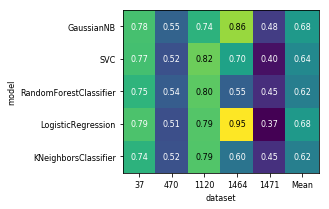

In [16]:
scores = []

for data_id in data_sets:
    # Get the data
    print('Dataset', data_id)
    data = oml.datasets.get_dataset(data_id)
    X, y, categorical = data.get_data(target=data.default_target_attribute, include_row_id=False, 
                                      return_categorical_indicator=True)
    scores.append([])
    
    # Test each model on the dataset
    for m in models:
        # Build a pipeline
        clf = Pipeline([
            ('imputer', Imputer(missing_values='NaN', strategy='mean', axis=0)),
            ('OneHotEncoder', OneHotEncoder(categorical_features=categorical, sparse=False, handle_unknown='ignore')),
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=4)),
            ('model', m)
        ])
        
        # Test the model
        cv_scores = cross_val_score(clf, X, y, cv=10, scoring='roc_auc', n_jobs=-1)
        scores[-1].append(cv_scores.mean())
#         print("\tModel:", m.__class__.__name__, '\tScore:', cv_scores.mean())  

scores = np.transpose(scores)
mean_scores = np.array([np.mean(k) for k in scores]).reshape(len(scores), 1)
scores = np.hstack((scores, mean_scores))
mglearn.tools.heatmap(scores, xlabel='dataset', xticklabels=data_sets+['Mean'], ylabel='model', 
                      yticklabels=[m.__class__.__name__ for m in models], cmap="viridis")

We found it is easier to visualize the performance results as a heatmap to compare them. Furthermore, we have created a new column "Mean" which represents the average performance of each model over all given datasets. With some basic intuition, we can see that we have two best performing models: the GaussianNB and the LogisticRegression. This is further confirmed by the fact that they both share the same highest recorded mean. Logistic regression is worse than GaussianNB for datasets 470 and 1471. In fact it scores the worst result for 1471 among all. To conclude, we pick GaussianNB to be the best algorithm here because the scores are either better or not that worse than logistic. In case of dataset 1464, though logistic scored the highest of 0.95, we believe GaussianNB generalizes better here.

#### Repeat the benchmark, but now additionally...

Dataset 37
Dataset 470
Dataset 1120
Dataset 1464
Dataset 1471


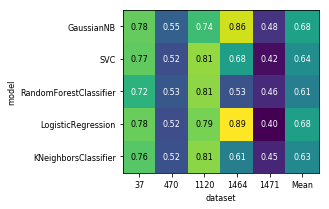

In [20]:
my_randoms = [1e-2, 1e-1, 1e0, 1e1, 1e2]
penalty_type = ['l1','l2']
param_grid = {
    models[0].__class__.__name__: {
        'model__n_neighbors': range(1, 10, 2)
     },
    models[1].__class__.__name__: {
        'model__C': my_randoms,
        'model__penalty': penalty_type 
     },
    models[2].__class__.__name__: {
        'model__n_estimators': [2**i for i in range(0,5)],
        'model__max_features': np.arange(1, 5)
    },
    models[3].__class__.__name__: {
        'model__C': my_randoms
    },
    models[4].__class__.__name__: {
    },
}
scores = []

for data_id in data_sets:
    # Get the data
    print('Dataset', data_id)
    data = oml.datasets.get_dataset(data_id)
    X, y, categorical = data.get_data(target=data.default_target_attribute, include_row_id=False, 
                                      return_categorical_indicator=True)
    scores.append([])
    
    # Test each model on the dataset
    for m in models:
        # Build a pipeline
        clf = Pipeline([
            ('imputer', Imputer(missing_values='NaN', strategy='mean', axis=0)),
            ('OneHotEncoder', OneHotEncoder(categorical_features=categorical, sparse=False, handle_unknown='ignore')),
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=4)),
            ('model', m)
        ])
        
        # Test the model
        grid = GridSearchCV(clf, param_grid[m.__class__.__name__], cv=3)
        cv_scores = cross_val_score(grid, X, y, cv=10, scoring='roc_auc', n_jobs=-1)
        scores[-1].append(cv_scores.mean())
#         print("\tModel:", m.__class__.__name__, '\tScore:', cv_scores.mean())
        
scores = np.transpose(scores)
mean_scores = np.array([np.mean(k) for k in scores]).reshape(len(scores), 1)
scores = np.hstack((scores, mean_scores))
mglearn.tools.heatmap(scores, xlabel='dataset', xticklabels=data_sets+['Mean'], ylabel='model', 
                      yticklabels=[m.__class__.__name__ for m in models], cmap="viridis")

The ranking of the algorithms does not seem to be affected by hyperparameter tuning. GaussianNB is still the best algorithm though LogisticRegression is a close second.

## Gaussian Processes (2 points (1+1))

Consider the RAM prices dataset (included in the data folder). Separate the data in a training set of all data points up until the year 2000, and a test set with all points after that.

- Train several of the algorithms we have covered in the course that can handle regression. Include at least linear regression, decision tree, and RandomForest. Which ones give the best $R^2$ performance on the test set? Plot the predictions (both on the training and test data) on the figure below. Use different colors for different algorithms or build multiple plots.
- Train a Gaussian process on an increasing amount of samples of the training data. Start with 5 random sample and plot the predictions (both the mean and the uncertainty interval) for both training and test data, as shown in class. Now add 5 more points and retrain and redraw. Do this a couple of times and interpret/explain what you see. Finally, train the Gaussian on the full dataset and again show plot the predictions. Evaluate on the test set using  $R^2$. Compare these results with those achieved with other algorithms and explain.

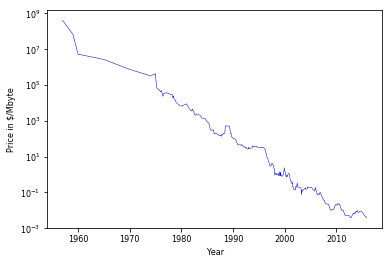

In [27]:
ram_prices = pd.read_csv('data/ram_price.csv')

plt.rcParams['figure.figsize'] = (6, 4)
_ = plt.semilogy(ram_prices.date, ram_prices.price)
_ = plt.xlabel("Year")
_ = plt.ylabel("Price in $/Mbyte")

X, y = ram_prices.date, ram_prices.price
X_train, y_train = ram_prices.loc[ram_prices.date <= 2000, 'date'], ram_prices.loc[ram_prices.date <= 2000, 'price']
X_test, y_test = ram_prices.loc[ram_prices.date > 2000, 'date'], ram_prices.loc[ram_prices.date > 2000, 'price']
X, X_train, X_test = X.reshape(-1, 1), X_train.reshape(-1, 1), X_test.reshape(-1, 1)

# scale the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
_ = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = np.append(X_train_scaled, X_test_scaled)

# Log transform the input
y_scaled = np.log1p(y)
y_train_scaled = np.log1p(y_train)
y_test_scaled = np.log1p(y_test)

#### Train several of the algorithms we have covered in the course that can handle regression.

linear Score: -282.150130423


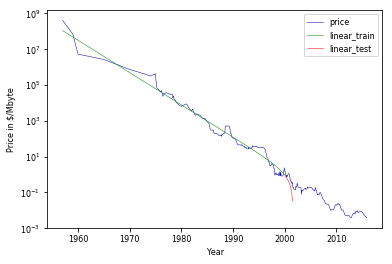

decision Score: -17.339808007


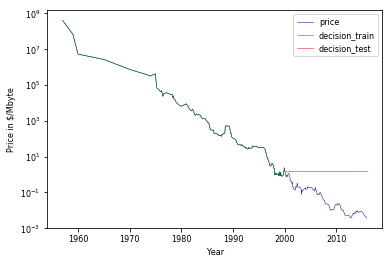

rf Score: -18.1133851864


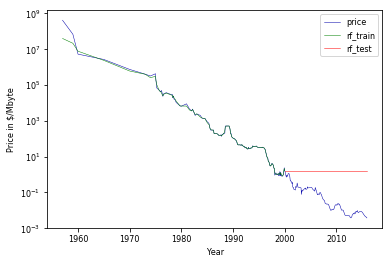

knn Score: -14.3844431588


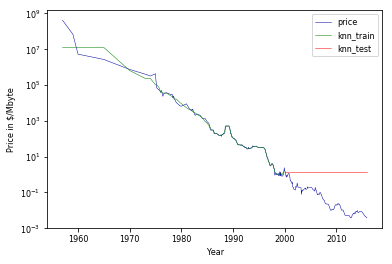

svr_r Score: -13.0917861992


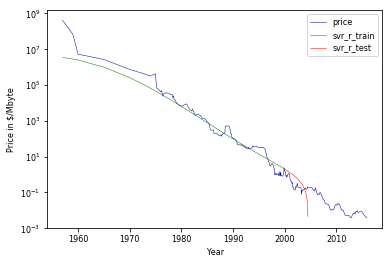

In [28]:
from sklearn.model_selection import GridSearchCV

for key, clf in estimators:
    grid = GridSearchCV(clf, {}, cv=5, scoring='r2', n_jobs=-1)
    _ = grid.fit(X_train_scaled, y_train_scaled)
    _ = clf.fit(X_train_scaled, y_train_scaled)
    
    # Get the R^2 performance
    score = grid.score(X_test_scaled, y_test_scaled)
    print(key, 'Score:', score)
    
    # Plot the predictions
    y_train_pred = np.expm1(grid.predict(X_train_scaled))
    y_test_pred = np.expm1(grid.predict(X_test_scaled))
    _ = plt.figure()
    _ = plt.semilogy(X, y)
    _ = plt.semilogy(X_train, y_train_pred, 'g-', label=key+"_train")
    _ = plt.semilogy(X_test, y_test_pred, 'r-', label=key+"_test")
    _ = plt.xlabel("Year")
    _ = plt.ylabel("Price in $/Mbyte")
    _ = plt.legend()
    plt.show()

From the results, we find that SVM with RBF kernel works best for this situation, so below we have retrained that specific model with hyper-parameter tuning. This produced much better predictions on the training data but strangely produced worse results on the test data which implies overfitting.

Mean score: -17.7516720056 +- 77.0613017055


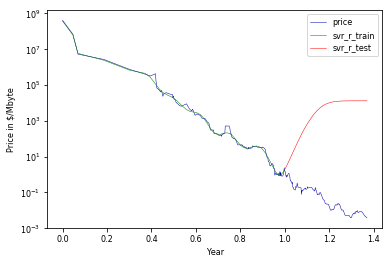

In [11]:
from sklearn.model_selection import GridSearchCV

key, clf = 'svr_r', SVR(kernel='rbf')
grid = GridSearchCV(clf, param_grid[key], cv=5, scoring='r2', n_jobs=-1)
_ = grid.fit(X_train_scaled, y_train_scaled)

# Get the R^2 performance
scores = grid.cv_results_['mean_test_score']
print('Mean score:', np.mean(scores), '+-', np.var(scores))

# Plot the predictions
y_train_pred = np.expm1(grid.predict(X_train_scaled))
y_test_pred = np.expm1(grid.predict(X_test_scaled))
_ = plt.figure()
_ = plt.semilogy(X_scaled, y)
_ = plt.semilogy(X_train_scaled, y_train_pred, 'g-', label=key+"_train")
_ = plt.semilogy(X_test_scaled, y_test_pred, 'r-', label=key+"_test")
_ = plt.xlabel("Year")
_ = plt.ylabel("Price in $/Mbyte")
_ = plt.legend()
plt.show()

#### Train a Gaussian process on an increasing amount of samples of the training data.

Number of samples: 5
R^2 score: 0.516605483275


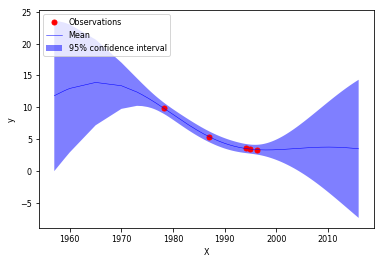

Number of samples: 10
R^2 score: 0.0213407685038


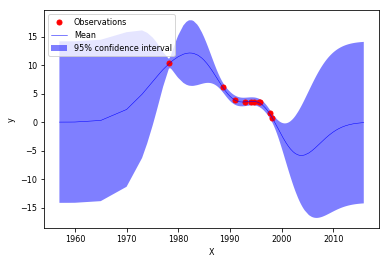

Number of samples: 15
R^2 score: -0.314101175586


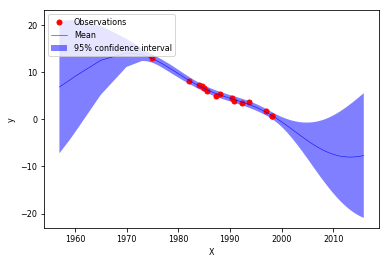

Number of samples: 20
R^2 score: 0.707626954034


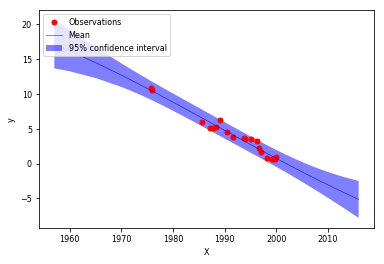

Number of samples: 25
R^2 score: 0.311132671381


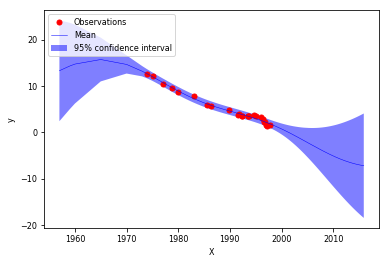

Number of samples: 30
R^2 score: -0.898214283948


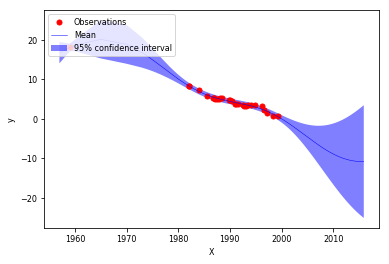

Number of samples: 35
R^2 score: 0.683547781179


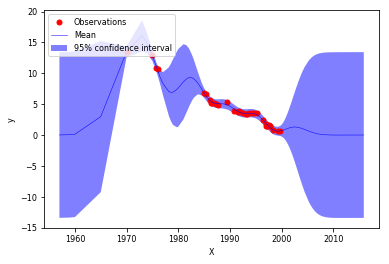

Number of samples: 40
R^2 score: 0.746462754008


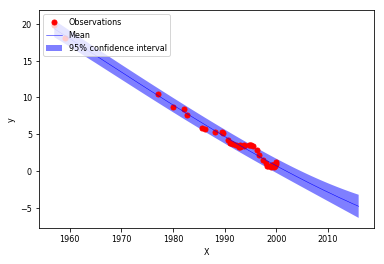

Number of samples: 45
R^2 score: 0.860450597061


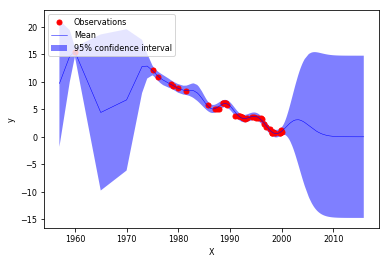

Number of samples: 50
R^2 score: 0.67058391752


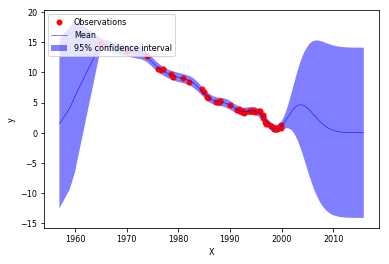

Train on the full dataset
R^2 score: -25.715167241


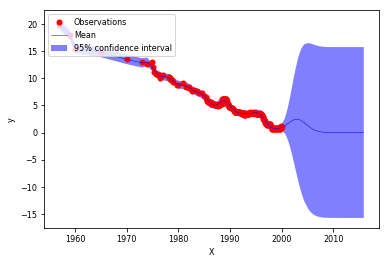

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel as W
from sklearn.metrics import r2_score
import numpy as np

# Instanciate a Gaussian Process model
kernel = W(1.0, (1e-1, 1e1)) + C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

for i in range(1, 12):
    # Extract a sample, for i > 11, select the full training set
    if i < 11:
        print('Number of samples:', 5*i)
        sample_X, _, sample_y, _ = train_test_split(X_train, y_train_scaled, train_size=5*i)
    else:
        print('Train on the full dataset')
        sample_X, sample_y = X_train, y_train_scaled
        
    # Build a GP model
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
    _ = gp.fit(sample_X, sample_y)
    
    # Make the predictions
    y_pred, sigma = gp.predict(X, return_std=True)
    
    # Get the test set score
    if i >= 11:
        # Get the R^2 performance
        y_test_pred = gp.predict(X_test)
        score = r2_score(y_test_scaled, y_test_pred)
    else:
        score = r2_score(y_scaled, y_pred)
    print('R^2 score:', score)
    
    # Plot the predictions
    _ = plt.figure()
    _ = plt.plot(sample_X, sample_y, 'r.', markersize=10, label=u'Observations')
    _ = plt.plot(X, y_pred, 'b-', label=u'Mean')
    _ = plt.fill(np.concatenate([X, X[::-1]]), 
                 np.concatenate([y_pred - 1.9600 * sigma, 
                                 (y_pred + 1.9600 * sigma)[::-1]]), 
                 alpha=.5, fc='b', ec='None', label='95% confidence interval')
    _ = plt.xlabel('X')
    _ = plt.ylabel('y')
    _ = plt.legend(loc='upper left')
    plt.show()

So we hae provided the predictions made by the Gaussian process regressor above. The plots as well as the R^2 performance suggests that when training on small samples containing closeby datapoints as can be seen from the plots, the scores are really good. As the size of the sample increases, more variance is introduced in the data. The GaussianProcessRegressor model is sensitive to these variance increases and the performance can be seen to reduce. This is primarily because the variance acts as noise in the training of the model. Lastly, in the case where we train on the full training set and only score on the test set, we have very poor R^2=-25.72. This is because this model is more suited towards the prediction of values that are close to the training sample whereas in this case it is clearly not. Our training sample contains much higher recorded prices than in the test sample due the linearity of the trend. This can be seen in the plot as well because the uncertainty for the test set is very large.

## A mini-data mining challenge (2 points (+1))

The goal here is to use everything you have learned to build the best model for a given classification task. The task is hosted on OpenML, so you will receive the train-test splits, and your model will be evaluated on the server. The goal is to reasonably select algorithms and hyperparameter settings to obtain the best model. You can also do model selection and parameter optimization as you have done before. Skeleton code is provided in the OpenML tutorial.

- All details can be found online:
    - The OpenML Task ID is 145677: https://www.openml.org/t/145677
    - The dataset description can be found here: https://www.openml.org/d/4134
- A leaderboard is kept of the best models: https://www.openml.org/t/145677#!people
    - You are able to see the solutions of others (by clicking in the timeline or run list), but resubmission of the exact same solution does not register on the leaderboard.
    - You can share one account (one API key) per team. In case you use two, we take the one that performs best.
- You can document the different experiments that you ran in this notebook. For each experiment, provide a description of how you chose the algorithms and parameters that you submitted. Try to reason about which experiments to try, don't just do an immense random search.
- Points are rewarded as follows:
    - 1 point for the breadth of experiments you ran (algorithms, hyperparameter settings)
    - 1 point for reasoning/insight and interpretation of the results
    - 1 (bonus) point for every team who has uploaded the best solution thus far **on AUC** (who reaches the top of the leaderboard at any moment during the assignment)
        - Note: On the leaderboard page, the 'frontier' line is drawn, and your top ranking is also shown in the table.
        
Note: Report AUC scores in your report as well. In case of issues with OpenML we will use the experiments and scores mentioned your report.

In [72]:
task = oml.tasks.get_task(145677)
bioresponse_data = task.get_dataset() # Download Bioresponse data
# Get the predictors X and the labels y
X, y, categorical = bioresponse_data.get_data(target=bioresponse_data.default_target_attribute, 
                                              return_categorical_indicator=True)

In [80]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

models = [LogisticRegression(random_state=66), SVC(), RandomForestClassifier()]
my_randoms = [1e-2, 1e-1, 1e0, 1e1, 1e2]
penalty_type = ['l1','l2']
param_grid = {
    models[0].__class__.__name__: {
        'select__percentile': (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 95),
        'model__C': my_randoms,
        'model__penalty': penalty_type
    },
    models[1].__class__.__name__: {
        'select__percentile': (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 95),
        'model__C': my_randoms,
        'model__penalty': penalty_type 
     },
    models[2].__class__.__name__: {
        'select__percentile': (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 95),
        'model__n_estimators': [2**i for i in range(9,13)],
        'model__max_features': np.arange(1, 5)
    },
}

In [ ]:
# Used this as a basis for our selection of models
# http://scikit-learn.org/stable/tutorial/machine_learning_map/
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, OneHotEncoder, StandardScaler
import time

def printTime(seconds):
    m, s = divmod(seconds, 60)
    h, m = divmod(m, 60)
    print("%d:%02d:%02d" % (h, m, s))

skf = StratifiedKFold(n_splits=5)

# Test each model on the dataset
for m in models:
    print('Model:', m.__class__.__name__)
    
    # Build a pipeline
    clf = Pipeline([
        ('OneHotEncoder', OneHotEncoder(categorical_features=categorical, sparse=False, handle_unknown='ignore')),
        ('scaler', StandardScaler()),
        ('select', SelectPercentile(score_func=f_classif)),
        ('model', m)
    ])

    # Test the model
    grid = GridSearchCV(clf, param_grid[m.__class__.__name__], scoring='roc_auc', cv=3, n_jobs=-1)
    cv_train_scores, cv_test_scores = [], []
    
    # K-fold cross validation (Nested CV)
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        start = time.time()
        print('\tCV fold iteration %d' % i, end='\t')
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        _ = grid.fit(X_train, y_train)
        cv_train_scores.append(grid.score(X_train, y_train))
        cv_test_scores.append(grid.score(X_test, y_test))
        printTime(time.time() - start)
    
    print('\tBest params:', grid.best_params_)
    print('\tMean train Score:', np.mean(cv_train_scores), '| Mean test Score:', np.mean(cv_test_scores))
    
    # Publish the run
    try:
        run = oml.runs.run_task(task, grid)
        p = run.publish()
        print("\tPublished to http://www.openml.org/r/%d" % run.run_id)
    except:
        pass

Model: LogisticRegression
	CV fold iteration 0	0:14:32
	CV fold iteration 1	0:16:16
	CV fold iteration 2	0:20:56
	CV fold iteration 3	0:20:11
	CV fold iteration 4	0:19:29
	Best params: {'select__percentile': 15, 'model__penalty': 'l2', 'model__C': 0.01}
	Mean train Score: 0.899519834222 | Mean test Score: 0.829684717725
Model: SVC
	CV fold iteration 0	0:06:06
	CV fold iteration 1	0:06:17
	CV fold iteration 2	0:06:02
	CV fold iteration 3	0:06:04
	CV fold iteration 4	0:06:10
	Best params: {'model__C': 1.0, 'select__percentile': 15}
	Mean train Score: 0.94483471095 | Mean test Score: 0.858199877617
Model: RandomForestClassifier
	CV fold iteration 0	0:29:42
	CV fold iteration 1	0:29:48
	CV fold iteration 2	0:29:33
	CV fold iteration 3	0:30:53
	CV fold iteration 4	0:28:47
	Best params: {'model__max_features': 4, 'model__n_estimators': 1024, 'select__percentile': 15}
	Mean train Score: 1.0 | Mean test Score: 0.86846528997


We encountered some problems in publishing our model tuned through a grid search. OpenML has some bug in uploading a grid model object. {Explain here choice of models and hyperparameters}